In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [95]:
df=pd.read_csv("crime_data.csv")

In [96]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [98]:
data=df.rename({"Unnamed: 0":"State"},axis=1)

In [99]:
data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [100]:
data.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [101]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [102]:
df_norm=norm_fun(data.iloc[:,1:])

In [103]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


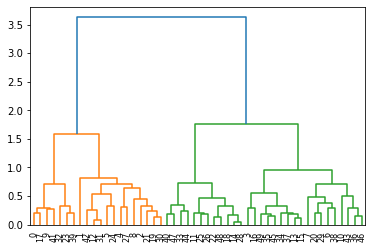

In [106]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="ward"))

In [122]:
hc=AgglomerativeClustering(n_clusters=10,affinity="euclidean",linkage="ward")

In [123]:
hc.fit_predict(df_norm)

array([9, 5, 0, 1, 0, 3, 8, 8, 0, 9, 7, 2, 3, 1, 2, 1, 1, 9, 2, 0, 8, 0,
       2, 4, 3, 2, 2, 0, 2, 8, 0, 3, 4, 6, 1, 1, 7, 1, 8, 4, 6, 9, 3, 7,
       6, 1, 7, 6, 2, 1], dtype=int64)

In [124]:
y_hc=hc.fit_predict(df_norm)

In [125]:
data["clusterid"]=y_hc

In [126]:
data

,State,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,9
1,Alaska,10.0,263,48,44.5,5
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,8
7,Delaware,5.9,238,72,15.8,8
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,9


In [127]:
data.groupby(["clusterid"])["State"].apply(lambda x: tuple(x))

clusterid
0    (Arizona, California, Florida, Maryland, Michi...
1    (Arkansas, Indiana, Kansas, Kentucky, Ohio, Ok...
2    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
3      (Colorado, Illinois, Missouri, New York, Texas)
4        (Mississippi, North Carolina, South Carolina)
5                                            (Alaska,)
6    (North Dakota, South Dakota, Vermont, West Vir...
7                   (Hawaii, Oregon, Utah, Washington)
8    (Connecticut, Delaware, Massachusetts, New Jer...
9             (Alabama, Georgia, Louisiana, Tennessee)
Name: State, dtype: object

In [129]:
data[data["State"].isin(['Alabama', 'Georgia', 'Louisiana', 'Tennessee'])]

,State,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,9
9,Georgia,17.4,211,60,25.8,9
17,Louisiana,15.4,249,66,22.2,9
41,Tennessee,13.2,188,59,26.9,9


# K-Means 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [143]:
df=pd.read_csv("crime_data.csv")

In [144]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [145]:
data1=df.rename({"Unnamed: 0":"State"},axis=1)

In [146]:
data1

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [147]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [148]:
crime_norm=norm_fun(data1.iloc[:,1:])

In [149]:
nc=[2,3,4,5,6,7,8,9,10,11]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(crime_norm)
    iner.append(km.inertia_)

In [150]:
iner

[6.596893867946199,
 5.010878493006419,
 3.690820410392112,
 3.183157731676654,
 2.850689241794877,
 2.623545372074983,
 2.4028019966285377,
 2.110605217993307,
 1.8807058232775649,
 1.7133815543750008]

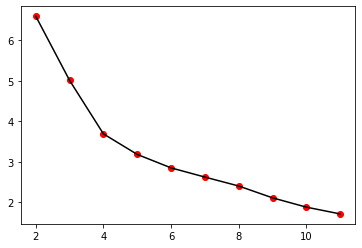

In [151]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [142]:
clusters4=KMeans(4,random_state=30).fit(crime_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [152]:
crime4=data.copy()
crime4['clusters4_id']=clusters4.labels_
crime4

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters4_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [153]:
clusters4.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [154]:
crime4.groupby('clusters4_id').agg(['mean']).reset_index()

,clusters4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,5.656250,138.875000,73.875000,18.781250
2,2,10.815385,257.384615,76.000000,33.192308
3,3,13.937500,243.625000,53.750000,21.412500


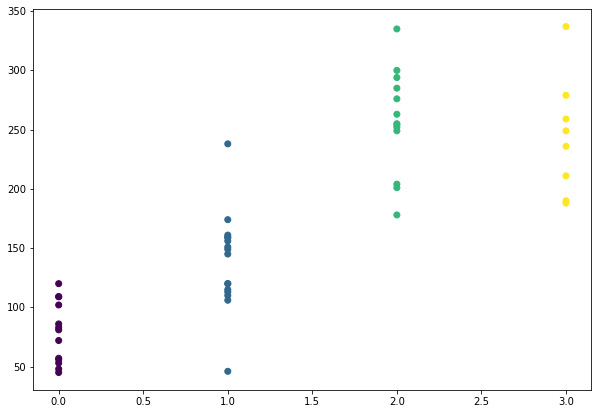

In [156]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['clusters4_id'],crime4['Assault'], c=clusters4.labels_)

# DBSCAN

In [172]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [173]:
data1

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [176]:
scaler = StandardScaler().fit(data1.iloc[:,1:])
crime_norm = scaler.transform(data1.iloc[:,1:])

In [177]:
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [178]:
dbscan = DBSCAN(eps=0.98, min_samples=3)
dbscan.fit(crime_norm)

DBSCAN(eps=0.98, min_samples=3)

In [179]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [180]:
data1

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [181]:
a1 = pd.DataFrame(dbscan.labels_,columns=['cluster_id'])
a1

,cluster_id
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0
